In [7]:
import numpy as np
import os
np.set_printoptions(threshold=np.inf, precision=4)
import matplotlib.pyplot as plt
import cv2

In [57]:

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
        plt.imshow(images[-1])
        plt.imshow(image, cmap=plt.get_cmap('gray'), alpha=0.5)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    print('np.array(fig.get_size_inches()) * n_images', np.array(fig.get_size_inches()) * n_images)
#     fig.set_size_inches([246, 164])
    plt.show()
    

In [52]:
# raw_data_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014908_00_Video/"
# file_pre = "20151114_014908_00_Video_vfr_497_skfr_487"

# test output
test_raw_data_path = "/s/red/b/nobackup/data/eggnog_cpm/from_scratch/0328180100pm/testing/"
test_file_pre = "20151116_230144_00_Video_vfr_1005_skfr_996_240x320_test"
# test_file_pre = "20151113_224707_00_Video_vfr_1015_skfr_990_240x320_test"


# ground truth
gt_raw_data_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s07/part1_layout_p14/20151116_230144_00_Video/"
gt_file_pre = "20151116_230144_00_Video_vfr_1005_skfr_996"
# gt_raw_data_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s04/part1_layout_p08/20151113_224707_00_Video/"
# gt_file_pre = "20151113_224707_00_Video_vfr_1015_skfr_990"

# original image 240x320
test_image = os.path.join(gt_raw_data_path, gt_file_pre + '_240x320.jpg')
original_image = cv2.imread(test_image)  # B,G,R order
rgb_image = original_image[:,:,[2,1,0]]

In [53]:
# 

test paf shape (30, 40, 36)
images len 73
np.array(fig.get_size_inches()) * n_images [31974. 21316.]


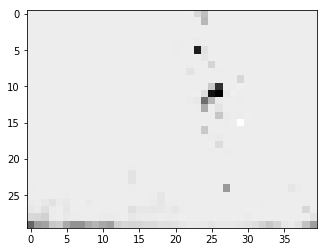

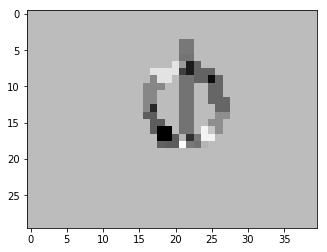

In [54]:
# show pafs

test_paf = np.load(os.path.join(test_raw_data_path, test_file_pre + '_paf30x40.npy'))
print("test paf shape", test_paf.shape)  # (30, 40, 36)
gt_paf = np.load(os.path.join(gt_raw_data_path, gt_file_pre + '_paf30x40.npy'))

summed_test_paf = np.sum(test_paf, axis=2)
summed_gt_paf = np.sum(gt_paf, axis=2)
# summed_pafx = np.zeros((paf.shape[0], paf.shape[1]))
# summed_pafy = np.zeros((paf.shape[0], paf.shape[1]))

images = []  # a list containing alternated test_paf and gt_paf
titles = []  # titles for images above
for i in range(test_paf.shape[2]):
    images.append(gt_paf[:,:,i])  #
    images.append(test_paf[:,:,i])  # 
    titles.append('GT_' + str(i))
    titles.append('TEST_' + str(i))
#     if i%2 == 0:
#         summed_pafx = summed_pafx + paf[:,:,i]
#     else:
#         summed_pafy = summed_pafy + paf[:,:,i]

# original image
images.append(rgb_image)
titles.append('rgb image')
print("images len", len(images))
show_images(images, 19, titles)

# plt.figure(2)
# plt.imshow(summed_pafx/paf.shape[2]/2, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)  
# plt.show()

# plt.figure(3)
# plt.imshow(summed_pafy/paf.shape[2]/2, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)  
# plt.show()

plt.figure(4)  
plt.imshow(summed_test_paf, cmap=plt.get_cmap('gray'))  
plt.show()

plt.figure(5)  
plt.imshow(summed_gt_paf, cmap=plt.get_cmap('gray'))  
plt.show()

# paf_pairs_indices = [[1, 14], [0, 1], [12, 0], [13, 0], 
#                     [4, 14], [5, 4], [6, 5], [7, 6], [15, 7], [16, 6],
#                     [8, 14], [9, 8], [10, 9], [11, 10], [17, 11], [18, 10],
#                     [14, 2], [2, 3]
#                     ]

In [58]:
# show heatmaps

test_heatmap = np.load(os.path.join(test_raw_data_path, test_file_pre + '_heatmap30x40.npy'))
print("test heatmap shape", test_heatmap.shape)  # (30, 40, 20)
gt_heatmap = np.load(os.path.join(gt_raw_data_path, gt_file_pre + '_heatmap30x40.npy'))

images = []  # a list containing alternated test_hm and gt_hm
titles = []  # titles for images above
for i in range(test_heatmap.shape[2]):
    images.append(gt_heatmap[:,:,i])  #
    images.append(test_heatmap[:,:,i])  # 
    titles.append('GT_' + str(i))
    titles.append('TEST_' + str(i))
    
#     if i == 19:
#         plt.figure(1) 
#         plt.imshow(test_heatmap[:,:,i], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)  
#         plt.show()
#         print("max, min, test_heatmap i = ", test_heatmap[:,:,i].max(), test_heatmap[:,:,i].min())

# original image
images.append(rgb_image)
titles.append('rgb image')
print("images len", len(images))
show_images(images, 11, titles)

test heatmap shape (30, 40, 20)
images len 41
np.array(fig.get_size_inches()) * n_images [10086.  6724.]


In [24]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    



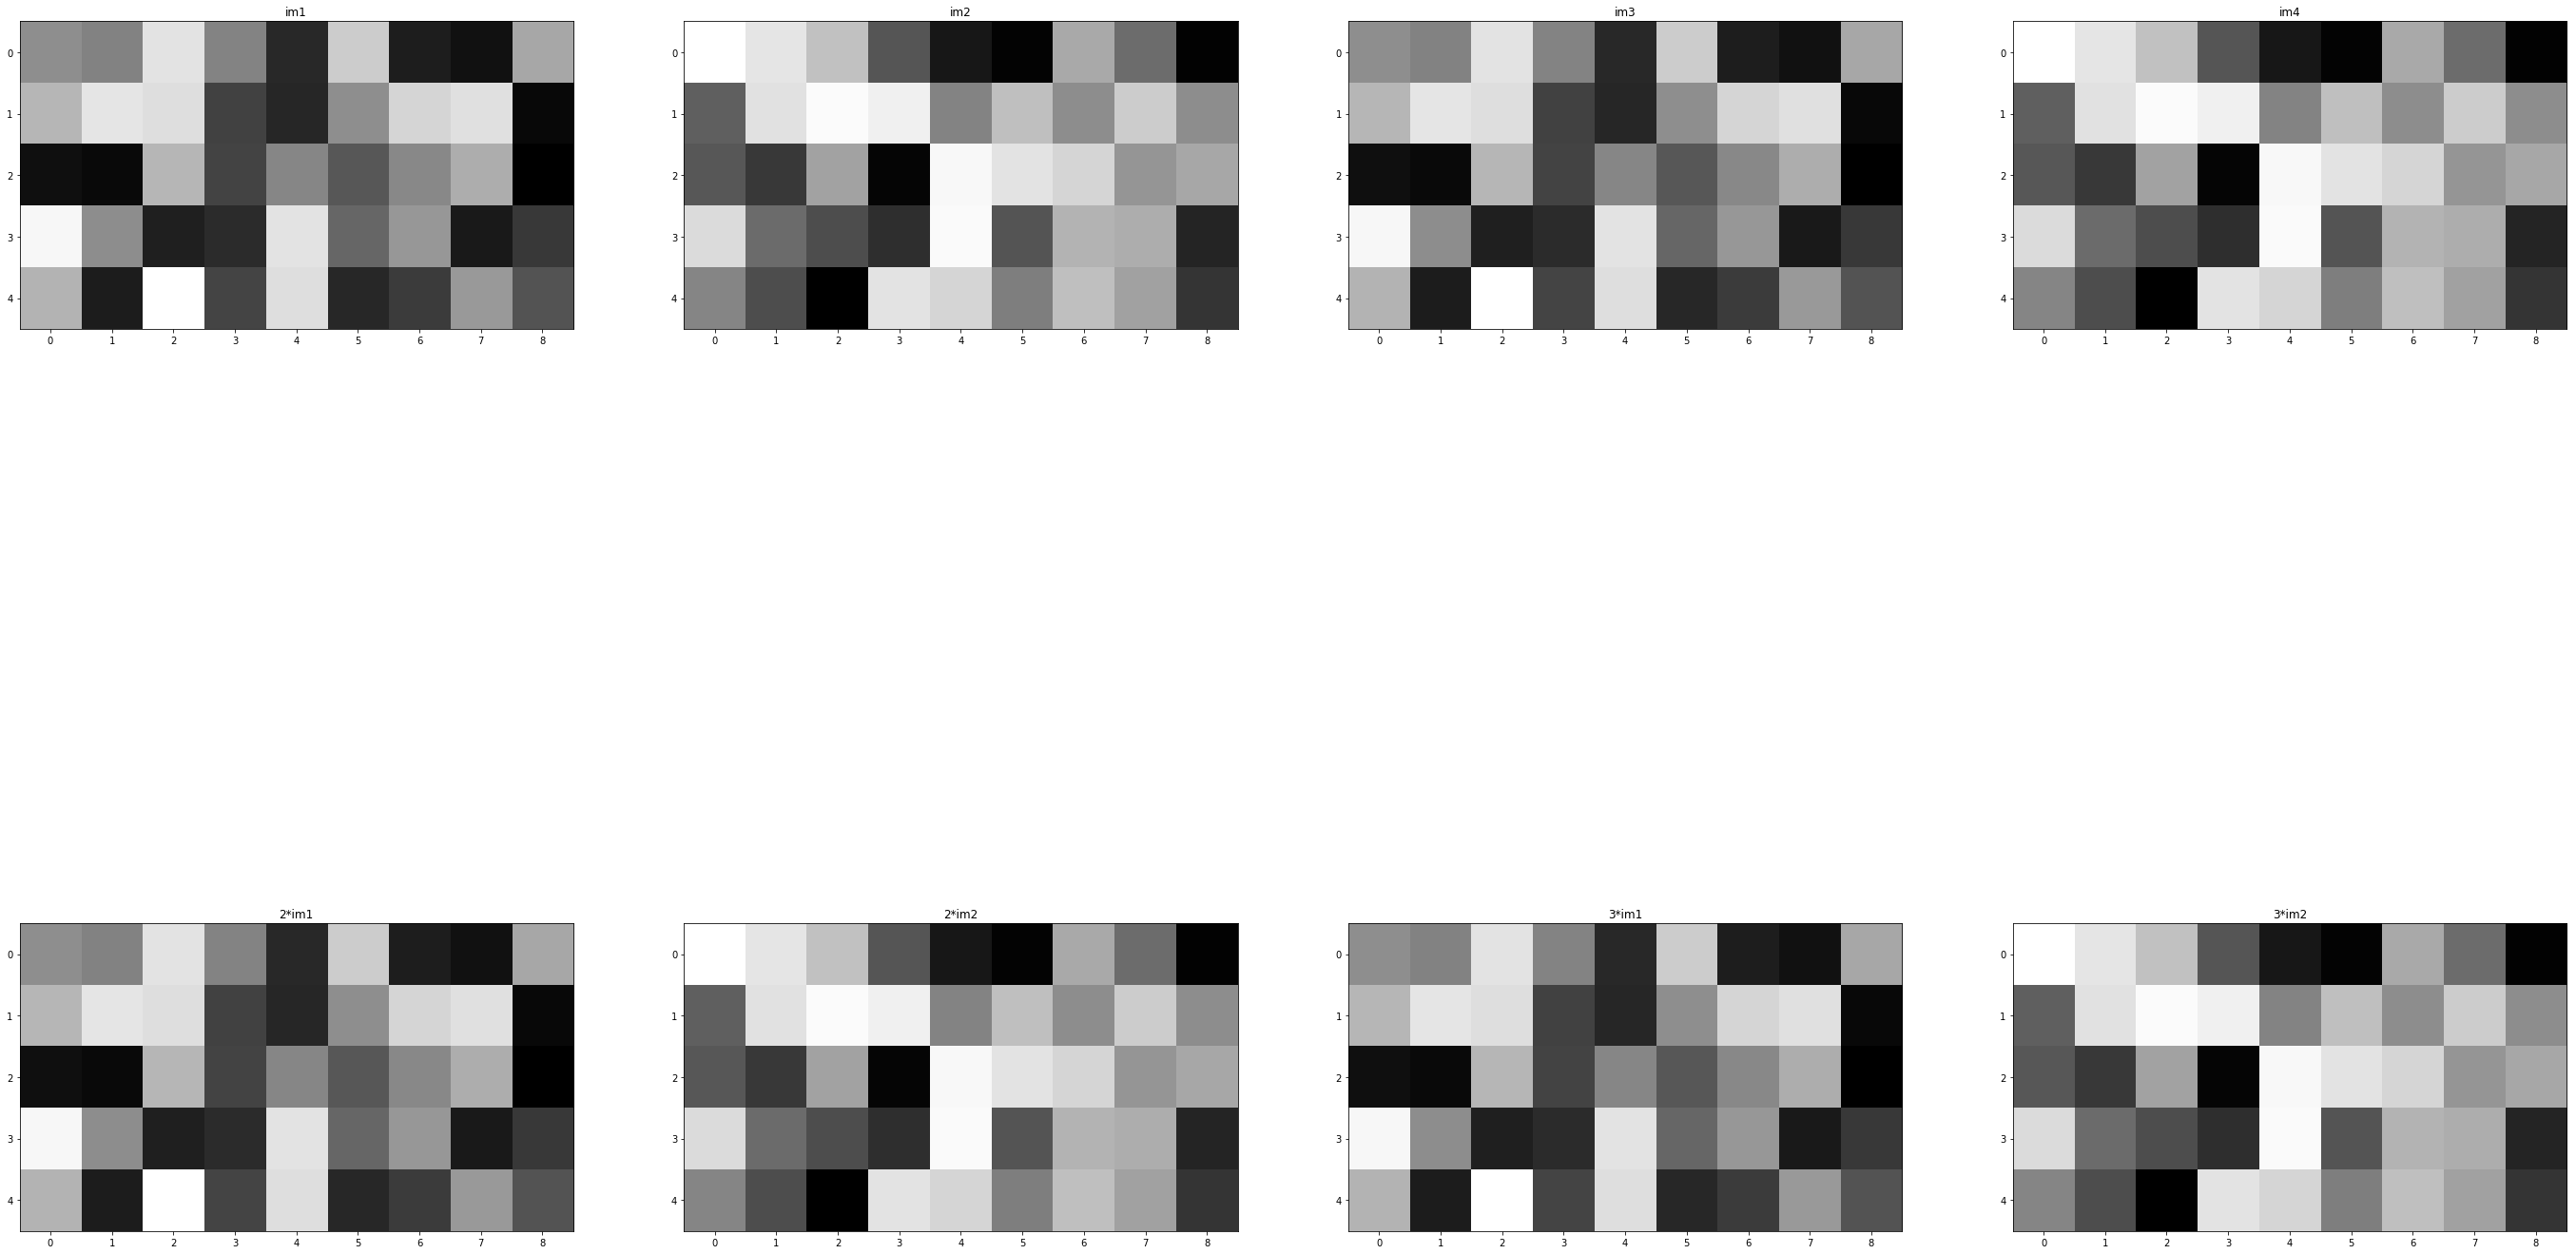

In [27]:
im1  = np.random.rand(5,9)
im2  = np.random.rand(5,9)
images = [im1, im2, im1, im2, 2*im1, 2*im2, 3*im1, 3*im2]
titles = ['im1', 'im2', 'im3', 'im4', '2*im1', '2*im2', '3*im1', '3*im2']

show_images(images, 2, titles)